<a href="https://colab.research.google.com/github/vasanta-chaganti/ektelo/blob/master/ComcastLatencyPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# @title Setup
from google.colab import auth
from google.cloud import bigquery
from google.colab import data_table

project = 'measurement-lab' # Project ID inserted based on the query results selected to explore
location = 'US' # Location inserted based on the query results selected to explore
client = bigquery.Client(project=project, location=location)
data_table.enable_dataframe_formatter()
auth.authenticate_user()

In [3]:
import pandas as pd

## Reference SQL syntax from the original job
Use the ```jobs.query```
[method](https://cloud.google.com/bigquery/docs/reference/rest/v2/jobs/query) to
return the SQL syntax from the job. This can be copied from the output cell
below to edit the query now or in the future. Alternatively, you can use
[this link](https://console.cloud.google.com/bigquery?j=measurement-lab:US:bquxjob_157ac143_18dd583a910)
back to BigQuery to edit the query within the BigQuery user interface.

In [4]:
# Running this code will display the query used to generate your previous job

job = client.get_job('bquxjob_157ac143_18dd583a910') # Job ID inserted based on the query results selected to explore
print(job.query)

SELECT
  clientASN,
  latencyMs
FROM
  `measurement-lab.cloudflare.speedtest_speed1`,
  UNNEST(latencyMs) AS latency
WHERE
  clientASN = 7922
ORDER BY 
  latency DESC


# Result set loaded from BigQuery job as a DataFrame
Query results are referenced from the Job ID ran from BigQuery and the query
does not need to be re-run to explore results. The ```to_dataframe```
[method](https://googleapis.dev/python/bigquery/latest/generated/google.cloud.bigquery.job.QueryJob.html#google.cloud.bigquery.job.QueryJob.to_dataframe)
downloads the results to a Pandas DataFrame by using the BigQuery Storage API.

To edit query syntax, you can do so from the BigQuery SQL editor or in the
```Optional:``` sections below.

In [5]:
# Running this code will read results from your previous job

job = client.get_job('bquxjob_157ac143_18dd583a910') # Job ID inserted based on the query results selected to explore
results = job.to_dataframe()
results

,clientASN,latencyMs
0,7922,"[4294967296.0, 4294967040.0, 4294967296.0, 429..."
1,7922,"[4294967296.0, 4294967040.0, 4294967296.0, 429..."
2,7922,"[4294967296.0, 4294967040.0, 4294967296.0, 429..."
3,7922,"[4294967296.0, 4294967040.0, 4294967296.0, 429..."
4,7922,"[4294967296.0, 4294967040.0, 4294967296.0, 429..."
...,...,...
10045933,7922,"[0.01, 19.2, 15.3, 16.5, 14.7, 18.9, 15.0, 14...."
10045934,7922,"[130.0, 102.0, 79.0, 22.0, 73.0, 23.0, 28.0, 2..."
10045935,7922,"[17.0, 17.0, 18.0, 17.0, 15.0, 24.0, 20.0, 0.0..."
10045936,7922,"[22.5, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.0..."


## Show descriptive statistics using describe()
Use the ```pandas DataFrame.describe()```
[method](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html)
to generate descriptive statistics. Descriptive statistics include those that
summarize the central tendency, dispersion and shape of a dataset’s
distribution, excluding ```NaN``` values. You may also use other Python methods
to interact with your data.

In [6]:
results_noASN = results.drop(columns="clientASN")

In [ ]:
expanded_latency = pd.DataFrame([[v for lst in arr for v in lst] for arr in results_noASN.values])
expanded_latency

In [8]:
[v for v in results_noASN.values[0]]

[array([4.29496730e+09, 4.29496704e+09, 4.29496730e+09, 4.29496730e+09,
        4.29496730e+09, 4.29496730e+09, 4.29496730e+09, 4.29496730e+09,
        4.29496730e+09, 4.29496730e+09, 4.29496730e+09, 4.29496730e+09,
        4.29496730e+09, 4.29496730e+09, 4.29496730e+09, 4.29496730e+09,
        4.29496730e+09, 4.29496730e+09, 4.29496730e+09, 4.29496730e+09])]

In [31]:
[[v for lst in arr for v in lst] for arr in results_noASN.iloc[0:2].values]

[[4294967296.0,
  4294967040.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0],
 [4294967296.0,
  4294967040.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0,
  4294967296.0]]

In [22]:
subset_1000 = pd.DataFrame([[v for lst in arr for v in lst] for arr in results_noASN.iloc[0:1000].values])

In [48]:
mean_max_min_1000000 = pd.DataFrame([a[0] for a in [[[np.mean(lst), np.max(lst), np.min(lst)] for lst in arr] for arr in results_noASN.iloc[0:1000000].values]], columns=["Mean", "Max", "Min"])

In [56]:
print(mean_max_min_1000000.iloc[0]["Max"])
print(mean_max_min_1000000.iloc[0]["Min"])
print(mean_max_min_1000000.iloc[0]["Mean"])

4294967296.0
4294967040.0
4294967283.2


In [63]:
mean_max_min_1000000["Mean"][0:1000]

0      4.294967e+09
1      4.294967e+09
2      4.294967e+09
3      4.294967e+09
4      4.294967e+09
           ...     
995    7.657500e+02
996    2.641550e+03
997    1.218400e+03
998    7.680050e+02
999    7.668000e+02
Name: Mean, Length: 1000, dtype: float64

In [57]:
error_bar = mean_max_min_1000000["Max"]-mean_max_min_1000000["Min"]

In [58]:
error_bar

0         256.0
1         256.0
2         256.0
3         256.0
4         256.0
          ...  
999995    191.8
999996     62.3
999997     32.6
999998    768.1
999999     54.8
Length: 1000000, dtype: float64

In [72]:
10**10

10000000000

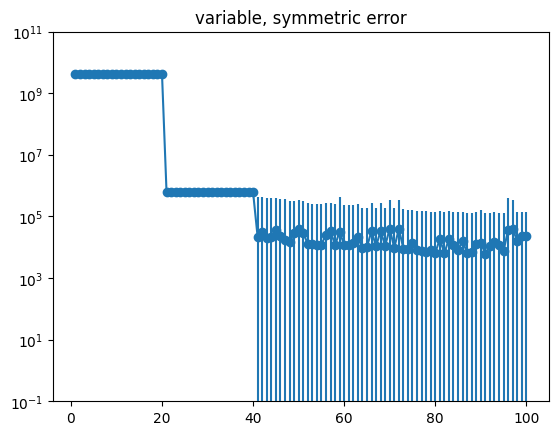

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# example data
x = np.arange(1, 101, 1)
y = mean_max_min_1000000["Mean"][0:100]

# example error bar values that vary with x-position
error = error_bar[0:100]

#fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
fig, ax0 = plt.subplots(nrows=1)
ax0.errorbar(x, y, yerr=error, fmt='-o')
ax0.set_title('Comcast Latency Plots')
ax0.set_yscale('log')
plt.ylim([0.1, 10**11])
# error bar values w/ different -/+ errors that
# also vary with the x-position
"""
lower_error = 0.4 * error
upper_error = error
asymmetric_error = [lower_error, upper_error]

ax1.errorbar(x, y, xerr=asymmetric_error, fmt='o')
ax1.set_title('variable, asymmetric error')
ax1.set_yscale('log')
"""
plt.show()

Text(0.5, 1.0, 'Comcast Latency Plots: with error bars showing Max, Min Values')

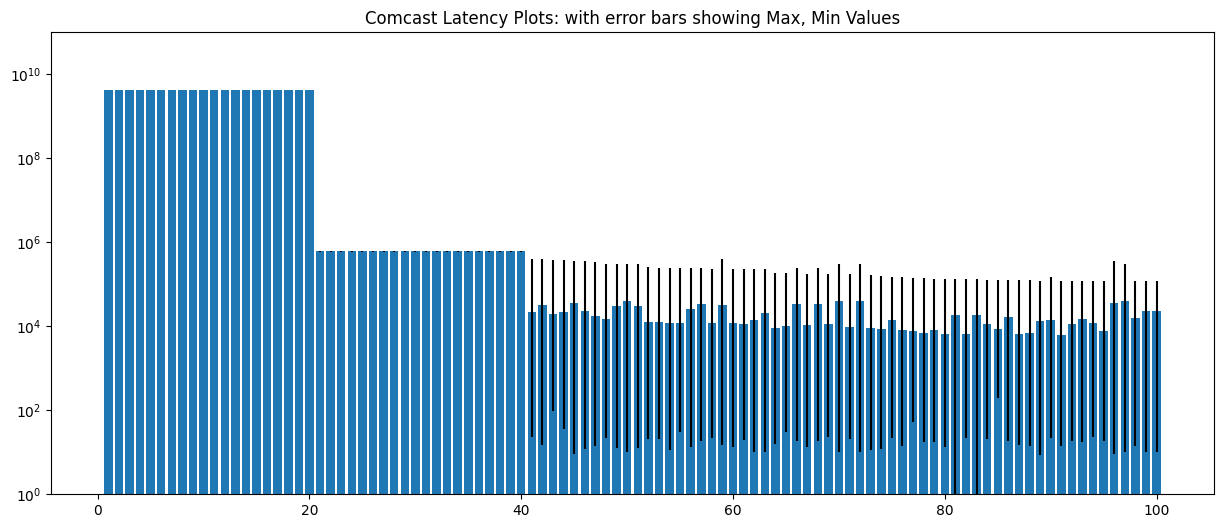

In [83]:
fig, ax = plt.subplots(figsize=(15, 6))

ax.bar(x=np.arange(1, 101, 1), height=mean_max_min_1000000["Mean"][0:100])
ax.set_yscale('log')

for i,p in enumerate(ax.patches):
    x = p.get_x()  # get the bottom left x corner of the bar
    w = p.get_width()  # get width of bar
    h = p.get_height()  # get height of bar
    min_y = mean_max_min_1000000["Min"][i]
    max_y = mean_max_min_1000000["Max"][i]
    plt.vlines(x+w/2, min_y, max_y, color='k')  # draw a vertical line
plt.ylim([1, 10**11])
ax.set_title('Comcast Latency Plots: with error bars showing Max, Min Values')